In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

c:\Users\Mihai\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df.loc[0:10,'job_title_short']

0     Senior Data Engineer
1             Data Analyst
2            Data Engineer
3            Data Engineer
4            Data Engineer
5            Data Engineer
6     Senior Data Engineer
7            Data Engineer
8         Business Analyst
9           Data Scientist
10           Data Engineer
Name: job_title_short, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [16]:
df[['job_country','job_location']]

,job_country,job_location
0,United States,"Watertown, CT"
1,Mexico,"Guadalajara, Jalisco, Mexico"
2,Germany,"Berlin, Germany"
3,United States,"San Antonio, TX"
4,Sudan,"Washington, DC"
...,...,...
785736,Singapore,Singapura
785737,Germany,"Bad Rodach, Jerman"
785738,Malaysia,Malaysia
785739,Sudan,"Newark, New Jersey, Amerika Serikat"


# Merge

In [17]:
df_ro = df[df['job_country']=='Romania'].copy()
df_ro['job_posted_month'] = df_ro['job_posted_date'].dt.strftime('%B')
df_ro_pivot = df_ro.pivot_table(
    index = 'job_posted_month',
    columns = 'job_title_short',
    aggfunc='size')
df_ro_pivot.reset_index(inplace=True)
df_ro_pivot['month_no'] = pd.to_datetime(df_ro_pivot['job_posted_month'],format = '%B').dt.month
df_ro_pivot.sort_values('month_no',inplace=True)
df_ro_pivot.set_index('job_posted_month',inplace=True)
df_ro_pivot.drop(columns='month_no',inplace=True)

In [18]:
df_ro_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,65,15,122,188,66,18,15,34,20,62
February,36,9,92,104,41,7,11,29,8,37
March,33,6,100,91,31,5,13,12,10,33
April,38,17,84,44,26,7,8,13,6,31
May,19,5,69,73,21,6,5,13,4,21
June,33,4,78,74,36,4,15,33,2,20
July,34,12,74,54,31,5,3,14,8,19
August,29,16,61,84,26,7,11,20,6,36
September,22,5,67,97,35,8,3,24,10,30


In [21]:
df_software_pivot = pd.read_csv("https://lukeb.co/software_csv",index_col = 'job_posted_month')
df_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [23]:
df_ro_merged = df_ro_pivot.merge(df_software_pivot, on = 'job_posted_month')

In [31]:
top_5 = df_ro_merged.sum().sort_values(ascending=False).head(5).index.to_list()
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Engineer']

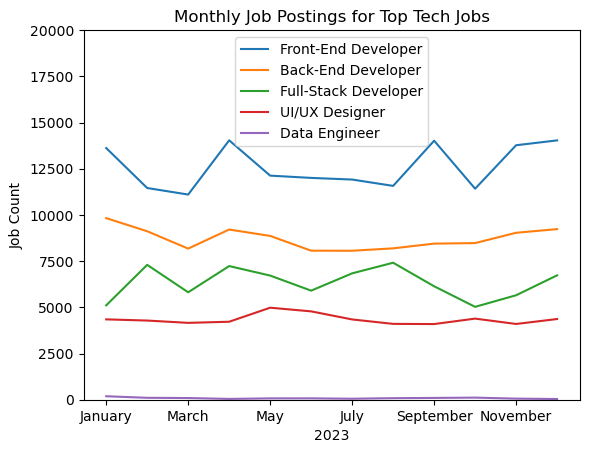

In [34]:
df_ro_merged[top_5].plot(kind = 'line')
plt.title('Monthly Job Postings for Top Tech Jobs')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0,20000)
plt.show()

# Concat

In [35]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b')

df['job_posted_month']

0         Jun
1         Jan
2         Oct
3         Jul
4         Aug
         ... 
785736    Mar
785737    Mar
785738    Mar
785739    Mar
785740    Mar
Name: job_posted_month, Length: 785741, dtype: object

In [37]:
months = df['job_posted_month'].unique()
dict_months = {month: df[df['job_posted_month'] == month] for month in months}

In [38]:
dict_months['Jan']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
39,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
53,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
55,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785699,Software Engineer,Simulation Engineer,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:30,False,False,Czechia,None,NaN,NaN,Ricardo Prague s.r.o.,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Jan
785700,Data Engineer,Data Engineer Ssr/Sr,"Mexico City, CDMX, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-12 06:19:55,True,False,Mexico,None,NaN,NaN,Tsoft,"['python', 'r', 'azure', 'aws', 'gcp', 'spark'...","{'cloud': ['azure', 'aws', 'gcp'], 'libraries'...",Jan
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,Jan
785704,Business Analyst,Business Analyst,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:20,False,False,Czechia,None,NaN,NaN,Cleverlance,None,None,Jan


In [40]:
df_q1 = pd.concat([dict_months['Jan'],dict_months['Feb'],dict_months['Mar']],ignore_index=True)

<Axes: xlabel='job_posted_month'>

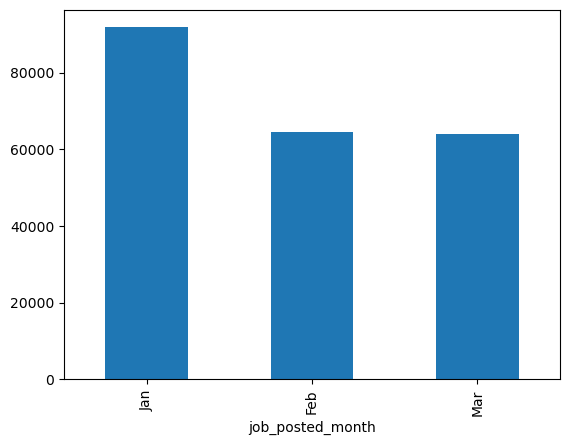

In [42]:
df_q1['job_posted_month'].value_counts().plot(kind='bar')

# Exporting data

In [43]:
df_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220484 entries, 0 to 220483
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        220484 non-null  object        
 1   job_title              220484 non-null  object        
 2   job_location           220207 non-null  object        
 3   job_via                220483 non-null  object        
 4   job_schedule_type      216776 non-null  object        
 5   job_work_from_home     220484 non-null  bool          
 6   search_location        220484 non-null  object        
 7   job_posted_date        220484 non-null  datetime64[ns]
 8   job_no_degree_mention  220484 non-null  bool          
 9   job_health_insurance   220484 non-null  bool          
 10  job_country            220479 non-null  object        
 11  salary_rate            8667 non-null    object        
 12  salary_year_avg        6510 non-null    floa

In [44]:
df_q1.head().to_clipboard(sep=',')

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,,,,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 'tableau']","{'analyst_tools': ['power bi', 'tableau'], 'programming': ['r', 'python', 'sql', 'nosql']}",Jan
1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,,,,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'scikit-learn', 'matplotlib', 'hadoop', 'spark']","{'libraries': ['pandas', 'numpy', 'scikit-learn', 'matplotlib', 'hadoop', 'spark'], 'programming': ['r', 'python', 'sql']}",Jan
2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,,,,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,,,,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws'], 'programming': ['sql', 'python']}",Jan
4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,,,,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python', 'sql']}",Jan


In [45]:
df_q1.to_csv('quarter_1.csv')

In [47]:
pd.read_csv('quarter_1.csv', index_col = 0)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,NaN,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,NaN,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,NaN,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,NaN,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220479,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",Mar
220480,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",Mar
220481,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Mar
220482,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",Mar


In [48]:
df_q1.to_excel('quarter_1.xlsx')

# apply()

In [49]:
df['salary_year_avg']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
785736   NaN
785737   NaN
785738   NaN
785739   NaN
785740   NaN
Name: salary_year_avg, Length: 785741, dtype: float64

In [51]:
df[df['salary_year_avg'].notna()]['salary_year_avg']

28        109500.0
77        140000.0
92        120000.0
100       228222.0
109        89000.0
            ...   
785624    139216.0
785641    150000.0
785648    221875.0
785682    157500.0
785692    157500.0
Name: salary_year_avg, Length: 22003, dtype: float64

In [52]:
df[pd.notna(df['salary_year_avg'])]['salary_year_avg']

28        109500.0
77        140000.0
92        120000.0
100       228222.0
109        89000.0
            ...   
785624    139216.0
785641    150000.0
785648    221875.0
785682    157500.0
785692    157500.0
Name: salary_year_avg, Length: 22003, dtype: float64

In [58]:
df_salary = df[pd.notna(df['salary_year_avg'])].copy()
def projected_salary(salary):
    return salary * 1.03

df_salary['salary_year_avg'] * 1.03

28        112785.00
77        144200.00
92        123600.00
100       235068.66
109        91670.00
            ...    
785624    143392.48
785641    154500.00
785648    228531.25
785682    162225.00
785692    162225.00
Name: salary_year_avg, Length: 22003, dtype: float64

In [59]:
df_salary['salary_year_avg'].apply(projected_salary)

28        112785.00
77        144200.00
92        123600.00
100       235068.66
109        91670.00
            ...    
785624    143392.48
785641    154500.00
785648    228531.25
785682    162225.00
785692    162225.00
Name: salary_year_avg, Length: 22003, dtype: float64

In [61]:
df_salary['salary_year_inflated'] = df_salary['salary_year_avg'] * 1.03
df_salary[['salary_year_avg','salary_year_inflated']]

,salary_year_avg,salary_year_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


In [63]:
df_salary['salary_year_inflated'] = df_salary['salary_year_avg'].apply(lambda x: x * 1.03)

In [75]:
df['job_skills'].apply(lambda x: x.strip('[]').split(',') if x is not None else x)

0                                                      None
1         ['r',  'python',  'sql',  'nosql',  'power bi'...
2         ['python',  'sql',  'c#',  'azure',  'airflow'...
3         ['python',  'c++',  'java',  'matlab',  'aws',...
4         ['bash',  'python',  'oracle',  'aws',  'ansib...
                                ...                        
785736    ['bash',  'python',  'perl',  'linux',  'unix'...
785737                    ['sas',  'sas',  'sql',  'excel']
785738                             ['powerpoint',  'excel']
785739    ['python',  'go',  'nosql',  'sql',  'mongo', ...
785740                                     ['aws',  'flow']
Name: job_skills, Length: 785741, dtype: object

In [77]:
import ast

def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)

df['job_skills'].apply(clean_list)

0                                                      None
1                [r, python, sql, nosql, power bi, tableau]
2         [python, sql, c#, azure, airflow, dax, docker,...
3         [python, c++, java, matlab, aws, tensorflow, k...
4         [bash, python, oracle, aws, ansible, puppet, j...
                                ...                        
785736    [bash, python, perl, linux, unix, kubernetes, ...
785737                               [sas, sas, sql, excel]
785738                                  [powerpoint, excel]
785739    [python, go, nosql, sql, mongo, shell, mysql, ...
785740                                          [aws, flow]
Name: job_skills, Length: 785741, dtype: object

In [80]:
df_clean_skills = df['job_skills'].apply(lambda x: x.strip('[]').split(',') if x is not None else x)
type(df_clean_skills[1])

list

### Calculate projected salary
senior - 5%

In [82]:
def projected_salary(row):
    if 'Senior'.lower() in row['job_title_short']:
        return 1.05 * row['salary_year_avg']

df_salary['salary_year_inflated'] = df_salary.apply(projected_salary, axis = 1)

df_salary[['job_title_short','salary_year_avg','salary_year_inflated']]

,job_title_short,salary_year_avg,salary_year_inflated
28,Data Scientist,109500.0,None
77,Data Engineer,140000.0,None
92,Data Engineer,120000.0,None
100,Data Scientist,228222.0,None
109,Data Analyst,89000.0,None
...,...,...,...
785624,Data Engineer,139216.0,None
785641,Data Engineer,150000.0,None
785648,Data Scientist,221875.0,None
785682,Data Scientist,157500.0,None


# Explode

In [112]:
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

In [113]:
type(df['job_skills'][1])

str

In [114]:
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [115]:
df_exploded = df.explode('job_skills')

In [116]:
df_exploded['job_skills'].value_counts().head(10)

job_skills
sql         384849
python      380909
aws         145381
azure       132527
r           130892
tableau     127213
excel       127018
spark       114609
power bi     98147
java         85612
Name: count, dtype: int64

<Axes: xlabel='job_skills'>

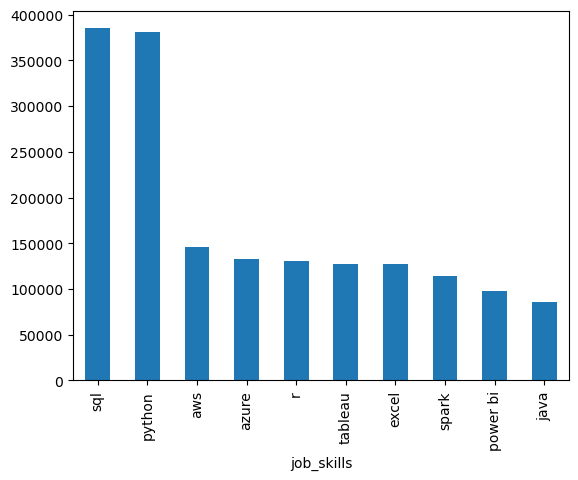

In [117]:
df_exploded['job_skills'].value_counts().head(10).plot(kind = 'bar')

In [130]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()
type(skills_count)

pandas.core.series.Series

In [133]:
df_skills_count = skills_count.reset_index(name = 'skill_count')
type(df_skills_count)

pandas.core.frame.DataFrame

In [134]:
df_skills_count = df_skills_count.sort_values(by = 'skill_count', ascending=False)
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [138]:
job_title = 'Data Analyst'
top_skills = 10
df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skills_final

,job_title_short,job_skills,skill_count
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
594,Data Analyst,r,29996
606,Data Analyst,sas,27998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280


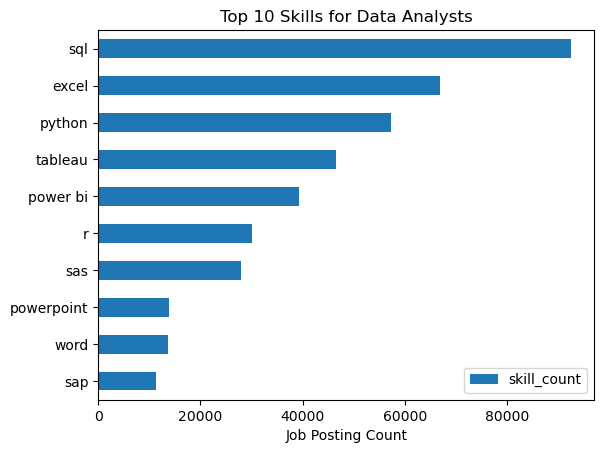

In [143]:
df_skills_final.plot(kind = 'barh', x = 'job_skills', y = 'skill_count')
plt.title(f'Top {top_skills} Skills for {job_title}s')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.gca().invert_yaxis()